In [1]:
#### Classifying newswires: a multiclass classification example

# loading the Reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


Using TensorFlow backend.


In [2]:
# encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [3]:
# One-hot encoding for categorical data
from keras.utils.np_utils import to_categorical
one_hot_train_lables = to_categorical(train_labels)
one_hot_test_lables = to_categorical(test_labels)


In [4]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_lables[:1000]
partial_y_train = one_hot_train_lables[1000:]


In [5]:
# the model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [6]:
# compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# training your model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 903us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 3s 384us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 3s 391us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 3s 351us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 3s 365us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 3s 339us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 3s 375us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


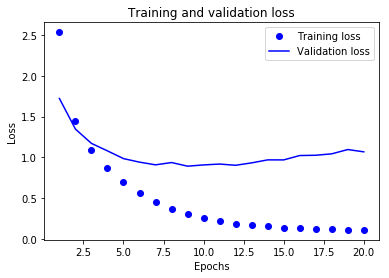

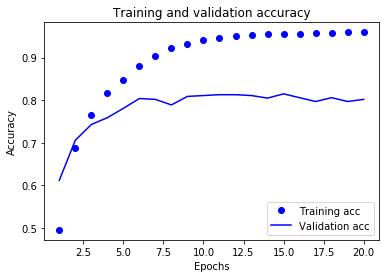

In [9]:
# plotting the training and validation loss
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# retraining a model from scratch
model.fit(x_train, one_hot_train_lables, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_lables)
results


Epoch 1/9
8982/8982 [==============================] - 1s 123us/step - loss: 0.2079 - acc: 0.9428
Epoch 2/9
8982/8982 [==============================] - 1s 90us/step - loss: 0.1677 - acc: 0.9470
Epoch 3/9
8982/8982 [==============================] - 1s 84us/step - loss: 0.1477 - acc: 0.9500
Epoch 4/9
8982/8982 [==============================] - 1s 84us/step - loss: 0.1352 - acc: 0.9525
Epoch 5/9
8982/8982 [==============================] - 1s 84us/step - loss: 0.1271 - acc: 0.9534
Epoch 6/9
8982/8982 [==============================] - 1s 85us/step - loss: 0.1226 - acc: 0.9544
Epoch 7/9
8982/8982 [==============================] - 1s 84us/step - loss: 0.1146 - acc: 0.9547
Epoch 8/9
8982/8982 [==============================] - 1s 81us/step - loss: 0.1136 - acc: 0.9547
Epoch 9/9
2246/2246 [==============================] - 0s 114us/step


[1.3245906318178797, 0.7773820124931454]

In [12]:
predictions = model.predict(x_test)


In [15]:
predicted_class = [np.argmax(x) for x in predictions]